# Advanced worksheet: Solving systems of Ordinary Differential Equations<a id="ODE"></a>


In [1]:
import scipy as sp
import matplotlib.pyplot as plt 

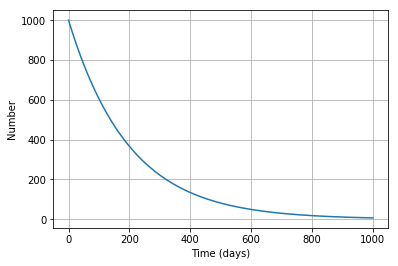

In [2]:
import scipy.integrate as spi

alpha = 0.0050228 #define constant of proportionality

# This function takes the variable to be differentiated, i.e. N as a function of t
def dif_func(N,t):
    dN_dt = -alpha*N # specify the derivative of N as a function of t (i.e. the differential equation)
    return dN_dt # returns differentiated values of N

# Create an array of time steps (1000 days in this instance)
t = sp.linspace(0.,1000.,10000) # solving every tenth of a day.

# set initial condition
N = 1000 # Starting with 1000 molecules
# Solve the differential equation
soln=spi.odeint(dif_func,N,t) # input arguments: function name, initial condition and timesteps

# Note: the variable soln now contains an array with the value of N at each time step t
# We can now plot N versus t

plt.grid()
plt.plot(t,soln)
plt.xlabel("Time (days)")
plt.ylabel("Number")

plt.show()


**Exercise: run the example code and compare the result with what you would expect. Extend the code to find the half life of this radioactive sample. Which radioactive element was used for this example?**

In [3]:
# Find the nearest point in the soln array to half of the starting N:
N_half = soln[0]/2
difference = sp.absolute(soln - N_half)
time_min_idx = sp.argmin(difference)
print("Half life (s):", t[time_min_idx])

('Half life (s):', 138.013801380138)


## Higher-order ODEs: Newton's second law


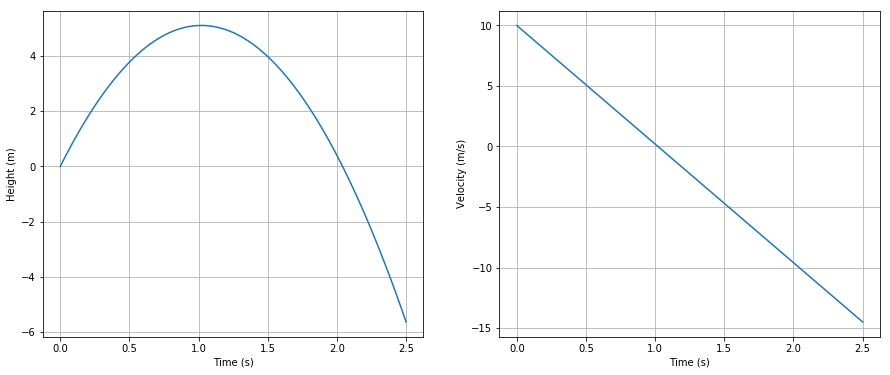

In [4]:
g = 9.8 #define magnitude of local gravity

# x and v are stored in an array called variables, and passed to the function, along with the time array t.
def dif_func(variables,t):
    x = variables[0] # x is in the first element of the array (as defined by the order of our initial guess below)
    v = variables[1] # v is in the second element of the array 
    a = -g # calculate the derivative of v (don't forget the acceleration is in the negative direction).
    return [v,a] # return an array containing the differentiated values of x and v i.e. [dx/dt, dv/dt]

# Create an array with time steps (2.5 seconds in this case)
t = sp.linspace(0.,2.5,100) # 100 time steps

# set initial conditions going up at 10 ms^-1 starting at ground level
variables0=[0.,10]

# solve the ODEs
soln=spi.odeint(dif_func,variables0,t) # input arguments: function name, initial conditions and timesteps

xsol = soln[:,0] # the calculated values of x as a function of t are in the first column of the returned array
vsol = soln[:,1] # the calculated values of v as a function of t are in the second column of the returned array

plt.rcParams.update({'figure.figsize': [15, 6]} )# Create a large figure to accommodate 2 sub plots

# Plot height as a function of time 
plt.subplot(1,2,1)
plt.grid()
plt.plot(t,xsol)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

# Plot velocity as a function of time 
plt.subplot(1,2,2)
plt.grid()
plt.plot(t,vsol)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

 
**Exercise: can you amend the code above to take into account what happens when the particle hits the ground (assuming a completely inelastic collision, where the particle loses all its energy instantaneously)? Hint: work with the array containing the solutions after the ODEs have been solved, instead of editing the function containing the differential equations.**



**Exercise: calculate the analytical solution - how does it compare with the numerical solution? Plot the error of the numerical solution (i.e. the analytical solution minus the numerical solution) as a function of time.**

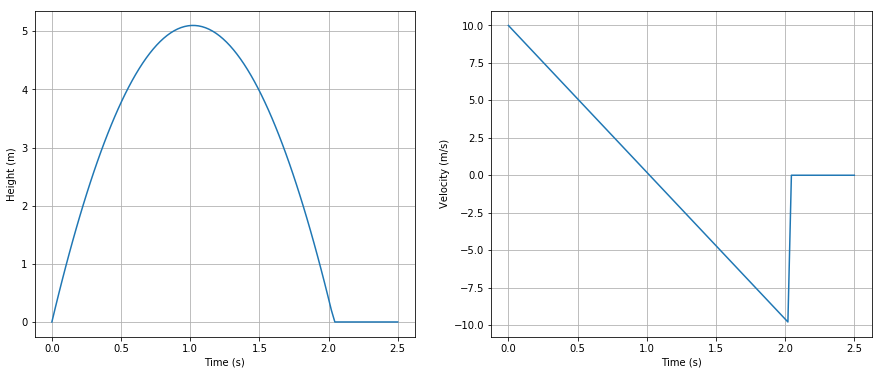

In [5]:
# Find the indices where xsol is less than zero
index = sp.where(xsol < 0)

# Creating a corrected array (because I want to save the other one for later comparisons)
xcor = sp.array(xsol)
vcor = sp.array(vsol)

# Set both the x and v of unphysical solutions to zero
xcor[index] = 0
vcor[index] = 0

# Plot the result
# Plot height as a function of time 
plt.subplot(1,2,1)
plt.grid()
plt.plot(t,xcor)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

# Plot velocity as a function of time 
plt.subplot(1,2,2)
plt.grid()
plt.plot(t,vcor)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

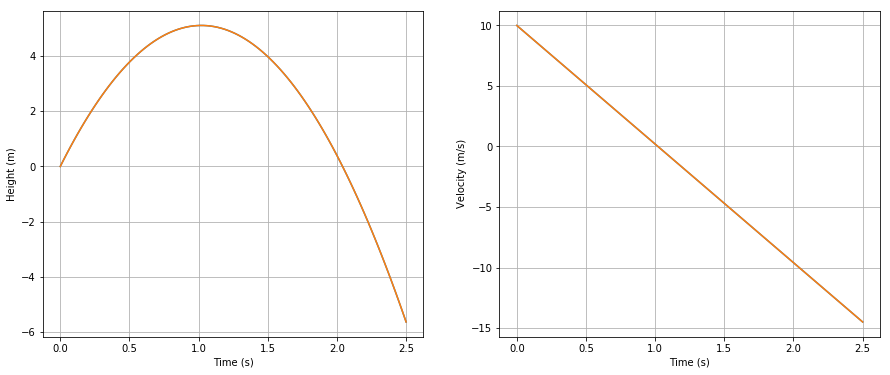

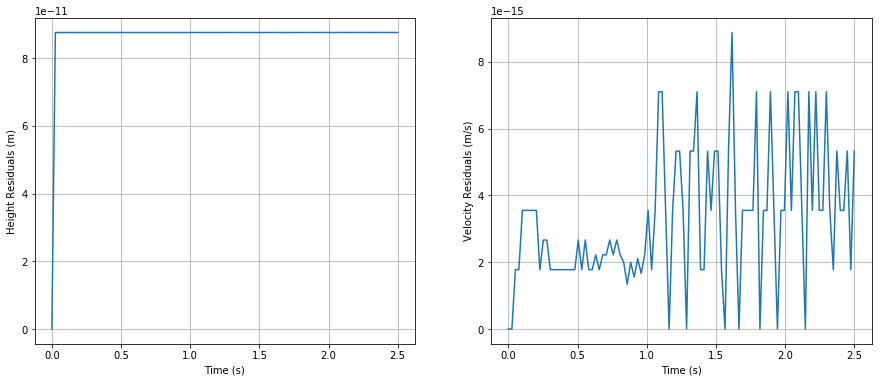

In [6]:
# Analytical solutions:
x_ana = variables0[1]*t - 0.5*g*t*t # x = v0 * t - 0.5*g*t^2
v_ana = variables0[1] - g*t # v = v0 - gt

# Plot both analytical and numerical solutions:
plt.subplot(1,2,1)
plt.grid()
plt.plot(t,x_ana)
plt.plot(t,xsol)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

plt.subplot(1,2,2)
plt.grid()
plt.plot(t,v_ana)
plt.plot(t,vsol)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.show()

# Plot residuals (i.e. error in numerical estimate):
plt.subplot(1,2,1)
plt.grid()
plt.plot(t,x_ana-xsol)
plt.xlabel("Time (s)")
plt.ylabel("Height Residuals (m)")

plt.subplot(1,2,2)
plt.grid()
plt.plot(t,v_ana-vsol)
plt.xlabel("Time (s)")
plt.ylabel("Velocity Residuals (m/s)")
plt.show()



**Exercise: model the motion of a tennis ball thrown straight up into the air in a similar manner to the example above, but including air resistance. Compare the cases with and without air resistance by plotting them in the same graph. Hint: start by writing out the new equation of motion and finding $dv/dt$. Think carefully about the sign of the drag force!**



** Exercise: model the motion of a tennis ball dropped from the Tower of Pisa. What is the terminal velocity of the ball (i.e. the maximum velocity the ball can reach)? What would be the result of the exact same experiment if the Tower of Pisa was located on Venus?** 

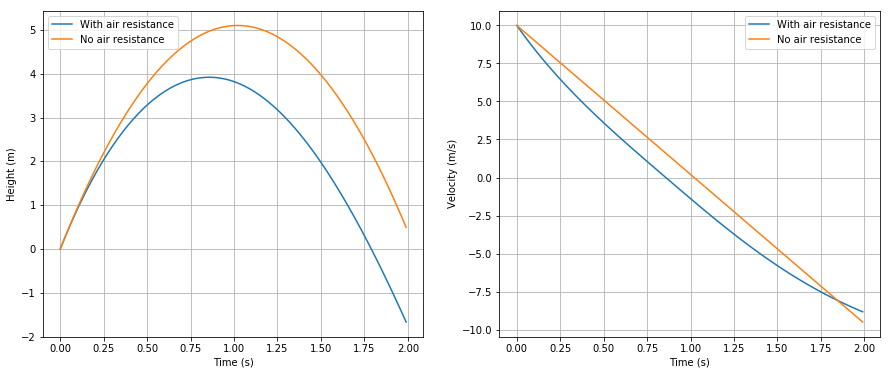

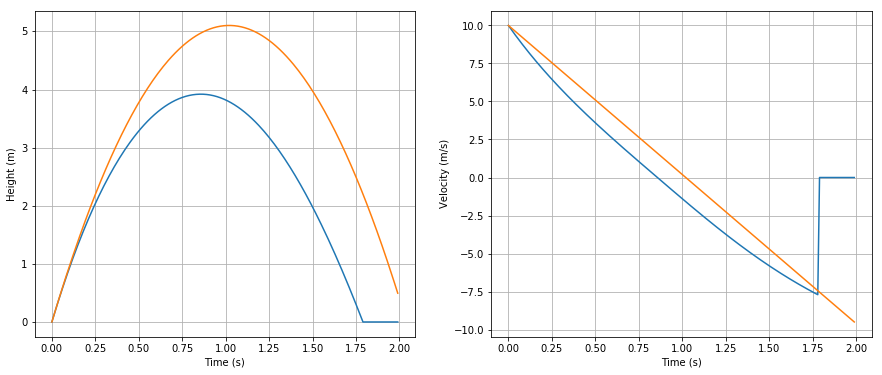

In [7]:
# Tennis ball thrown up in the air

g   = 9.8 # define magnitude of local gravity
r   = 6.5e-2 # radius of a tennis ball
m   = 58e-3 # mass of a tennis ball
rho = 1.2 # density of air
C   = 0.47 # drag coefficient

constant = 0.5*rho*sp.pi*r*r*C # constant factor in drag force equation

dt = 0.01 # time step

#called with the variables to be differentiated, i.e. x and v as a function of t
def dif_func(variables,t):
    x = variables[0]
    v = variables[1]
    a = -g - sp.sign(v) * constant/m * v*v #don't forget drag is in opposite direction of v     
    return [v,a]
#returns differentiated values of x and v (i.e. dx/dt = v and dv/dt = a)

t = sp.arange(0.,2,dt) # solving every tenth of a second - only 2 seconds needed before ball hits the ground

# set initial conditions going up at 10 ms^-1 starting at ground level
variables0=[0.,10]
soln=spi.odeint(dif_func,variables0,t) # function name, initial conditions and timesteps

#print(soln) # if you want to print the entire solutions
xsol = soln[:,0]
vsol = soln[:,1]

x_ana = variables0[1]*t - 0.5*g*t*t # No air resistance
v_ana = variables0[1] - g*t # No air resistance

plt.rcParams.update({'figure.figsize': [15, 6]} )
plt.subplot(1,2,1)
plt.grid()
plt.plot(t,xsol, label='With air resistance')
plt.plot(t,x_ana, label='No air resistance')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

plt.subplot(1,2,2)
plt.grid()
plt.plot(t,vsol, label='With air resistance')
plt.plot(t,v_ana, label='No air resistance')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

# Correction to set solutions to zero when ball hits the ground (second set of plots):
# Find the indices where xsol is less than zero
index = sp.where(xsol < 0)

# Creating a corrected array (because I want to save the other one for later comparisons)
xcor = sp.array(xsol)
vcor = sp.array(vsol)

# Set both the x and v of unphysical solutions to zero
xcor[index] = 0
vcor[index] = 0

# Plot height as a function of time 
plt.subplot(1,2,1)
plt.grid()
plt.plot(t,xcor)
plt.plot(t,x_ana)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

# Plot velocity as a function of time 
plt.subplot(1,2,2)
plt.grid()
plt.plot(t,vcor)
plt.plot(t,v_ana)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()


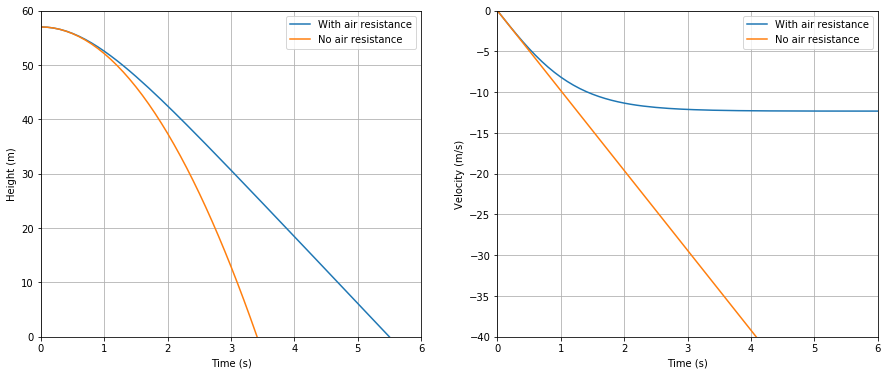

In [8]:
# Tennis ball dropped down the Tower of Pisa on Earth

g   = 9.8 # define magnitude of local gravity
r   = 6.5e-2 # radius of a tennis ball
m   = 58e-3 # mass of a tennis ball
rho = 1.2 # density of air
C   = 0.47 # drag coefficient

constant = 0.5*rho*sp.pi*r*r*C # constant factor in drag force equation

#called with the variables to be differentiated, i.e. x and v as a function of t
def dif_func(variables,t):
    x = variables[0]
    v = variables[1]
    a = -g - sp.sign(v) * constant/m * v*v #don't forget drag is in opposite direction of v 
    return [v,a]
#returns differentiated values of x and v (i.e. dx/dt = v and dv/dt = a)

t = sp.arange(0.,40,0.1) # solving every tenth of a second 

# set initial conditions: height = 57 m (Tower of Pisa), v = 0
variables0=[57.,0]
soln=spi.odeint(dif_func,variables0,t) # function name, initial conditions and timesteps

#print(soln) # if you want to print the entire solutions
xsol = soln[:,0]
vsol = soln[:,1]

x_ana = variables0[0] + variables0[1]*t - 0.5*g*t*t # No air resistance
v_ana = variables0[1] - g*t # No air resistance

plt.rcParams.update({'figure.figsize': [15, 6]} )
plt.subplot(1,2,1)
plt.grid()
plt.ylim([0,60])
plt.xlim([0,6])# only 6 seconds needed before ball hits the ground
plt.plot(t,xsol, label='With air resistance')
plt.plot(t,x_ana, label='No air resistance')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

plt.subplot(1,2,2)
plt.grid()
plt.ylim([-40,0])
plt.xlim([0,6])
plt.plot(t,vsol, label='With air resistance')
plt.plot(t,v_ana, label='No air resistance')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()



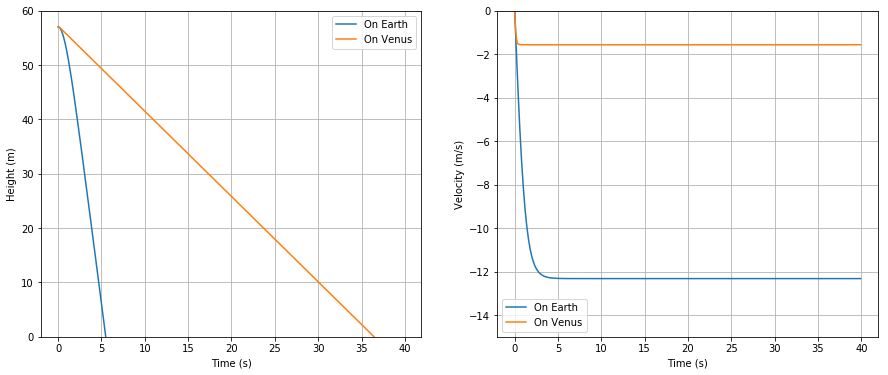

In [9]:
# Tennis ball dropped down the Tower of Pisa on Venus

g   = 8.87 # define magnitude of local gravity
rho = 67 # density of atmosphere

constant = 0.5*rho*sp.pi*r*r*C # constant factor in drag force equation
soln_venus=spi.odeint(dif_func,variables0,t) # function name, initial conditions and timesteps

#print(soln) # if you want to print the entire solutions
xsol_venus = soln_venus[:,0]
vsol_venus = soln_venus[:,1]

plt.rcParams.update({'figure.figsize': [15, 6]} )
plt.subplot(1,2,1)
plt.grid()
plt.ylim([0,60])
plt.plot(t,xsol, label='On Earth')
plt.plot(t,xsol_venus, label='On Venus')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

plt.subplot(1,2,2)
plt.grid()
plt.ylim([-15,0])
plt.plot(t,vsol, label='On Earth')
plt.plot(t,vsol_venus, label='On Venus')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()


[ 0.5        51.16820602]


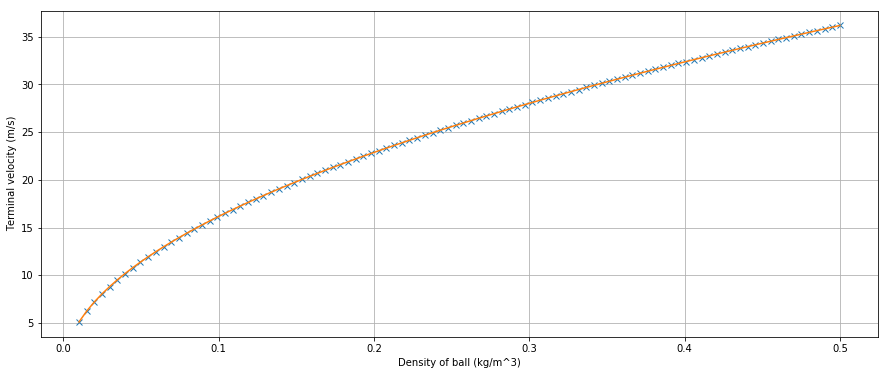

In [10]:
# ball of varying density dropped down the Tower of Pisa on Earth

g   = 9.8 # define magnitude of local gravity
r   = 6.5e-2 # radius of a tennis ball
rho = 1.2 # density of air
C   = 0.47 # drag coefficient

constant = 0.5*rho*sp.pi*r*r*C # constant factor in drag force equation

m_array = sp.linspace(1e-2,5e-1,100)
v_terminal = sp.array([])

# set initial conditions: height = 57 m (Tower of Pisa), v = 0
variables0=[57.,0]

for m in m_array:
    soln=spi.odeint(dif_func,variables0,t) # function name, initial conditions and timesteps
    v_terminal = sp.append(v_terminal, -1*soln[-1,1])

plt.grid()
plt.plot(m_array,v_terminal,'x')
plt.xlabel("Density of ball (kg/m^3)")
plt.ylabel("Terminal velocity (m/s)")


def fit_func(m,exponent,factor):
    return factor*(m**exponent)

guess = [1,1]
coeff = sp.optimize.curve_fit(fit_func,m_array,v_terminal)
print(coeff[0])

fit = fit_func(m_array,*coeff[0])
plt.plot(m_array,fit)
plt.show()


## Harmonic Oscillators

If you are interested in numerical modelling and would like to spend more time on it, try the scenarios below. Each box takes the model a step further and hence becomes more challenging - you can decide for yourself how far you want to take it. 

### Simple harmonic motion

**Exercise: write this second order differentional equation as a series of first order differential equations and create a simulation of a similar system with a spring constant $k=18\,\rm Nm^{-1}$ and a mass of 0.5 kg. Plot both the position and the velocity of the mass if intitally you extend the spring by 10 cm. Run your simulation for 10 s. You should think about what is happening to the energy in this system.**

### Damped harmonic motion


**Exercise: modify your simulations to include this damping. Investigate how the motion changes with different values of $b$. Specifically, try values of $b$ that are less than $6$, $b=6$ and values for $b$ that are much greater than $6$. You should try to describe what you see and decide whether or not the motion is oscillatory or not. Again, think about what is happening to the energy in this system.**

### Forced oscillators


**Exercise: adapt your previous code to include the driving force. Start with with you mass at rest at the unextended length of the spring. Investigate the motion of the mass for different values of $\Omega$. You might want to especially consider both the situation where the damping is light (i.e. $b$ is quite small) and where damping is very heavy (i.e. $b$ is very large). You should run you simulation for more than 10s (perhaps 100s is better here but do investigate how the mass goes from stationary to its final motion). Take care to look at the amplitude of the motion.**


### Coupled oscillators

**Exercise: rearrange the equations above into a set of four first differential equations. Write a simulation of this situation. We suggest that you start with $k_2$ being a lot smaller than $k_1$. Start the simulation with just one of the masses displaced from its equilibrium situation by 10 cm and everything else at rest. What is happening to the energy here?**

There are no solutions for this question - if you want to go over it with a member of staff then email us!